## Uganda NLP, transcription stats

In [122]:
# Setup
import os 
import json
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup 
import re
from nltk.corpus import stopwords # Import the stop word list
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk

stops = set(stopwords.words("english")) 
directory_c2m = 'C:/Users/iof2265/Box/Kamwenge Graduation Study/07_Questionnaires&Data/Cohort 2 IPT ST/5_media/2_NLP_transcriptions'
directory_bs = r'C:\Users\iof2265\OneDrive - Northwestern University\Uganda NLP work\3_Data\txt files all'


In [123]:
## Function to count number of txt files i the directory
def count_txt_files(directory):
    txt_file_count = 0
    # Walk through all files and directories within the directory
    for dirpath, dirnames, filenames in os.walk(directory):
        for file in filenames:
            if file.endswith('.txt'):
                txt_file_count += 1
    return txt_file_count

In [124]:
print(f"Number of .txt files in transcription folders: {count_txt_files(directory_c2m)}")

Number of .txt files in transcription folders: 1827


In [125]:
## Function to extract respondent text from a raw file (not enum talk)
def get_text(file_path): 
    with open(file_path, "r", encoding='utf-8') as input_file:
        lines = input_file.readlines()
        txt = [line for line in lines if line.strip() and not line.startswith("*")] ## Not include text starting with * wich corresponds to enumerator talk
    return " ".join(txt)

In [126]:
## Function to extract respondent text from a raw file (not enum talk)
def get_text_enum(file_path): 
    with open(file_path, "r", encoding='utf-8') as input_file:
        lines = input_file.readlines()
        txt_enum = [line for line in lines if line.strip() and line.startswith("*")] ## Text from enumerators, starting with *
    #return " ".join(txt)
    return " ".join(txt_enum)

In [127]:
## Function to clean text data and put in the right format
def prepare_words(rawtext): 
    # 1. Remove HTML
    #text = BeautifulSoup(rawtext).get_text() 
    text = rawtext
    # 2. Replace accents and other characters
    text = text.replace("ü", "u")
    # 3. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", text) # This needs to be reviewew!!!!
    # 4. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    num_words = len(words)
    # 5. Convert the stop words to a set for efficiency
    #stops = set(stopwords.words("english"))    
    # 6. Remove stop words
    meaningful_words = [w for w in words if not w in stops] 
    num_mean_words = len(meaningful_words)
    # 7. Return the union of the words
    #print(num_words)
    return(" ".join(meaningful_words), num_words, num_mean_words) 
    #return(num_words)
    #return(num_mean_words)

### Cohort 2 midline

In [128]:
## Loop through files in directory and use functions above to save clean data in new vector
clean_text = []
word_count = []
word_count_nostop =[]
word_count_enum = []
text_files = []

# Walk through all files and directories within the directory
for dirpath, dirnames, filenames in os.walk(directory_path):
    for file in filenames:
        if file.endswith('.txt'):
            #txt_file_count += 1
            full_path = os.path.join(dirpath, file)
            clean_text.append(prepare_words(get_text(full_path))[0])
            word_count.append(prepare_words(get_text(full_path))[1])
            word_count_nostop.append(prepare_words(get_text(full_path))[2])
            word_count_enum.append(prepare_words(get_text_enum(full_path))[2])
            text_files.append(file)

In [129]:
## Put vectors in a dataframe
txt_df = pd.DataFrame({'txt_file':text_files,'text':clean_text, 'words':word_count, 'words_nostop': word_count_nostop, 'words_enum': word_count_enum})
txt_df.head()

,txt_file,text,words,words_nostop,words_enum
0,03.04.2024 2002_Economic.txt,family earn income means must done something h...,42,18,14
1,03.04.2024 2002_Important.txt,household source income avsi came one goat six...,131,59,6
2,03.04.2024 2002_typical day.txt,normal day rest work also bathe children look ...,39,16,4
3,03.04.2024 2004_Economic.txt,challenge sources income tghings going well wa...,76,27,8
4,03.04.2024 2004_Important.txt,important god gave children challenge alot dif...,76,31,4


In [131]:
## Descriptive stats for number of words and number of meaningful words
txt_df[['words', 'words_nostop', 'words_enum']].describe()

,words,words_nostop,words_enum
count,1827.000000,1827.000000,1827.000000
mean,52.333333,23.830323,13.327313
std,44.524124,20.280527,13.756931
min,0.000000,0.000000,0.000000
25%,27.000000,12.000000,5.000000
50%,43.000000,19.000000,9.000000
75%,66.000000,30.000000,17.000000
max,686.000000,332.000000,163.000000


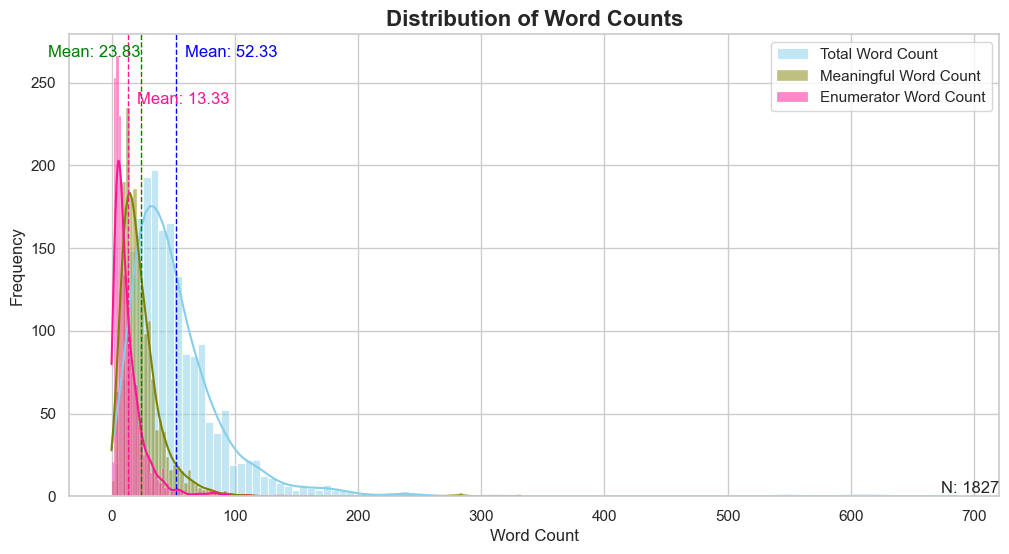

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming txt_df is your DataFrame with the word counts
# It should have columns named 'words', 'words_nostop', and 'words_enum'

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the overlaid distributions
plt.figure(figsize=(12, 6))

# Using a darker shade of pink
dark_pink = "#FF1493"

sns.histplot(txt_df['words'], kde=True, color="skyblue", label='Total Word Count')
sns.histplot(txt_df['words_nostop'], kde=True, color="olive", label='Meaningful Word Count')
sns.histplot(txt_df['words_enum'], kde=True, color=dark_pink, label='Enumerator Word Count')

# Calculate means
mean_word_count = txt_df['words'].mean()
mean_word_count_nostop = txt_df['words_nostop'].mean()
mean_word_count_enum = txt_df['words_enum'].mean()

# Draw vertical lines for means
plt.axvline(mean_word_count, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_word_count_nostop, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_word_count_enum, color=dark_pink, linestyle='dashed', linewidth=1)

# Add text labels for means, adjust positions
plt.text(mean_word_count + plt.xlim()[1]*0.01, plt.ylim()[1]*0.95, f'Mean: {mean_word_count:.2f}', color='blue')
plt.text(mean_word_count_nostop, plt.ylim()[1]*0.95, f'Mean: {mean_word_count_nostop:.2f}', color='green', ha='right')  # Moved higher
plt.text(mean_word_count_enum + plt.xlim()[1]*0.01, plt.ylim()[1]*0.85, f'Mean: {mean_word_count_enum:.2f}', color=dark_pink)

# Add label for number of observations in the bottom right corner
plt.text(plt.xlim()[1], plt.ylim()[0], f'N: {len(txt_df)}', 
         horizontalalignment='right', verticalalignment='bottom')

# Adjust legend position
plt.legend(loc='upper right')

plt.title('Distribution of Word Counts', fontsize=16, fontweight='bold')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.show()


### Cohort 2 bs

In [133]:
## Loop through files in directory and use functions above to save clean data in new vector
clean_text = []
word_count = []
word_count_nostop =[]
word_count_enum = []
text_files = []

# Walk through all files and directories within the directory
for dirpath, dirnames, filenames in os.walk(directory_bs):
    for file in filenames:
        if file.endswith('.txt'):
            #txt_file_count += 1
            full_path = os.path.join(dirpath, file)
            clean_text.append(prepare_words(get_text(full_path))[0])
            word_count.append(prepare_words(get_text(full_path))[1])
            word_count_nostop.append(prepare_words(get_text(full_path))[2])
            word_count_enum.append(prepare_words(get_text_enum(full_path))[2])
            text_files.append(file)

In [134]:
## Put vectors in a dataframe
txt_df = pd.DataFrame({'txt_file':text_files,'text':clean_text, 'words':word_count, 'words_nostop': word_count_nostop, 'words_enum': word_count_enum})
txt_df.head()

,txt_file,text,words,words_nostop,words_enum
0,128021_economic.txt,way get money basing current situation practic...,58,24,31
1,128021_important.txt,repeat question take god thing life taking car...,56,28,47
2,128021_typical day.txt,uhhmmm usually cut aahh wake morning wash face...,106,55,50
3,128034_economic.txt,uuhhmmm uuhhmmm income income home comes seaso...,126,58,33
4,128034_important.txt,minute respond question respond way understand...,60,23,20


In [135]:
## Descriptive stats for number of words and number of meaningful words
txt_df[['words', 'words_nostop', 'words_enum']].describe()

,words,words_nostop,words_enum
count,551.000000,551.000000,551.000000
mean,57.600726,25.451906,15.816697
std,42.995859,18.609405,10.191305
min,0.000000,0.000000,0.000000
25%,30.000000,13.500000,9.000000
50%,49.000000,22.000000,14.000000
75%,73.000000,33.000000,21.000000
max,362.000000,156.000000,64.000000


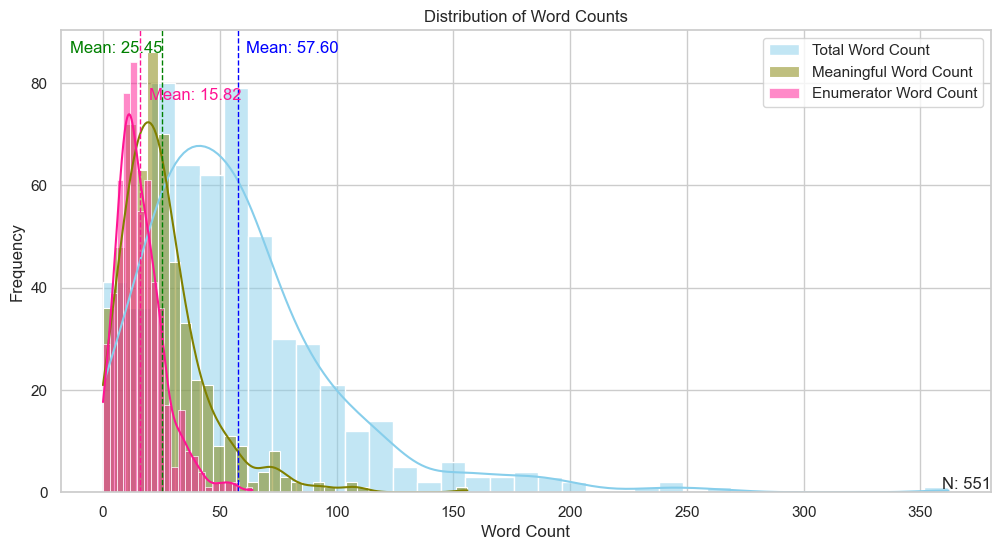

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming txt_df is your DataFrame with the word counts
# It should have columns named 'words', 'words_nostop', and 'words_enum'

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the overlaid distributions
plt.figure(figsize=(12, 6))

# Using a darker shade of pink
dark_pink = "#FF1493"

sns.histplot(txt_df['words'], kde=True, color="skyblue", label='Total Word Count')
sns.histplot(txt_df['words_nostop'], kde=True, color="olive", label='Meaningful Word Count')
sns.histplot(txt_df['words_enum'], kde=True, color=dark_pink, label='Enumerator Word Count')

# Calculate means
mean_word_count = txt_df['words'].mean()
mean_word_count_nostop = txt_df['words_nostop'].mean()
mean_word_count_enum = txt_df['words_enum'].mean()

# Draw vertical lines for means
plt.axvline(mean_word_count, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_word_count_nostop, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_word_count_enum, color=dark_pink, linestyle='dashed', linewidth=1)

# Add text labels for means, adjust positions
plt.text(mean_word_count + plt.xlim()[1]*0.01, plt.ylim()[1]*0.95, f'Mean: {mean_word_count:.2f}', color='blue')
plt.text(mean_word_count_nostop, plt.ylim()[1]*0.95, f'Mean: {mean_word_count_nostop:.2f}', color='green', ha='right')  # Moved higher
plt.text(mean_word_count_enum + plt.xlim()[1]*0.01, plt.ylim()[1]*0.85, f'Mean: {mean_word_count_enum:.2f}', color=dark_pink)

# Add label for number of observations in the bottom right corner
plt.text(plt.xlim()[1], plt.ylim()[0], f'N: {len(txt_df)}', 
         horizontalalignment='right', verticalalignment='bottom')

# Adjust legend position
plt.legend(loc='upper right')

plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.show()

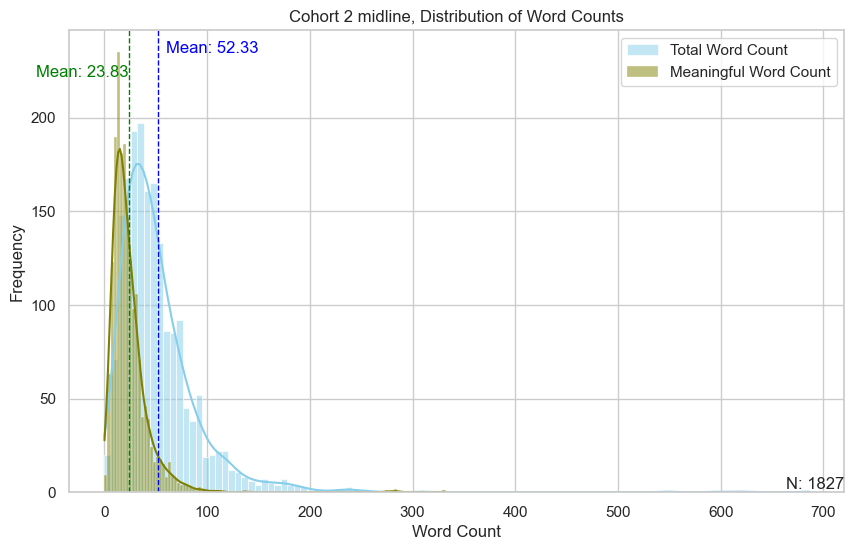

In [86]:
# Calculate the number of observations
num_observations = len(txt_df)

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the overlaid distributions
plt.figure(figsize=(10, 6))

sns.histplot(txt_df['words'], kde=True, color="skyblue", label='Total Word Count')
sns.histplot(txt_df['words_nostop'], kde=True, color="olive", label='Meaningful Word Count')

# Calculate means
mean_word_count = txt_df['words'].mean()
mean_word_count_nostop = txt_df['words_nostop'].mean()

# Draw vertical lines for means
plt.axvline(mean_word_count, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_word_count_nostop, color='green', linestyle='dashed', linewidth=1)

# Add text labels for means
plt.text(mean_word_count + plt.xlim()[1]*0.01, plt.ylim()[1]*0.95, f'Mean: {mean_word_count:.2f}', color='blue')
plt.text(mean_word_count_nostop, plt.ylim()[1]*0.90, f'Mean: {mean_word_count_nostop:.2f}', color='green', ha='right')

# Add label for number of observations in the bottom right corner
plt.text(plt.xlim()[1], plt.ylim()[0], f'N: {num_observations}', 
         horizontalalignment='right', verticalalignment='bottom')

# Adjust legend position
plt.legend(loc='upper right')

plt.title('Cohort 2 midline, Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.show()

Text(0, 0.5, 'Frequency')

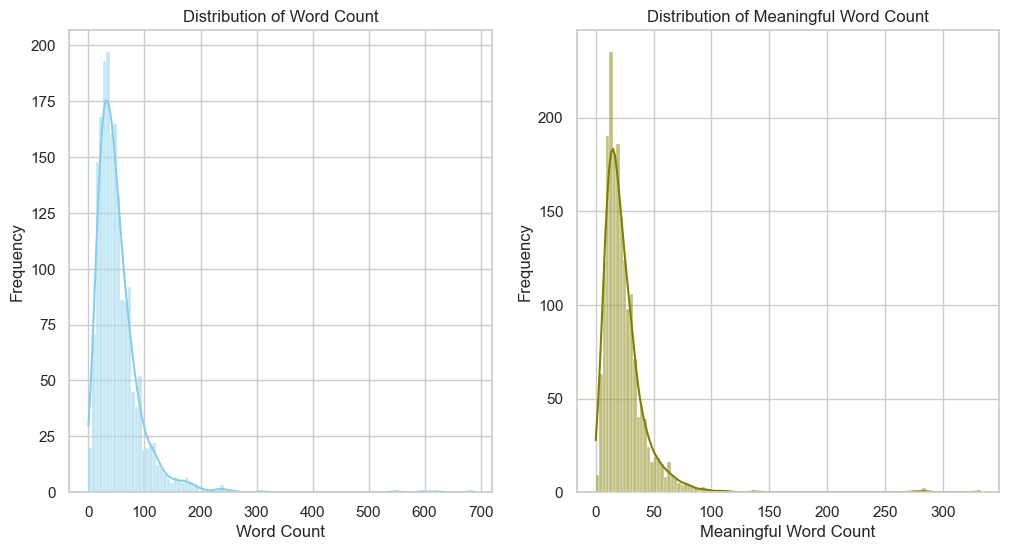

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Histogram for word_count
plt.subplot(1, 2, 1)
sns.histplot(txt_df['words'], kde=True, color="skyblue")
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Histogram for word_count_nostop
plt.subplot(1, 2, 2)
sns.histplot(txt_df['words_nostop'], kde=True, color="olive")
plt.title('Distribution of Meaningful Word Count')
plt.xlabel('Meaningful Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()